## Group by: split-apply-combine

In [326]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Splitting an object into groups

In [327]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                 index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                 columns=('class', 'order', 'max_speed'))

In [328]:
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


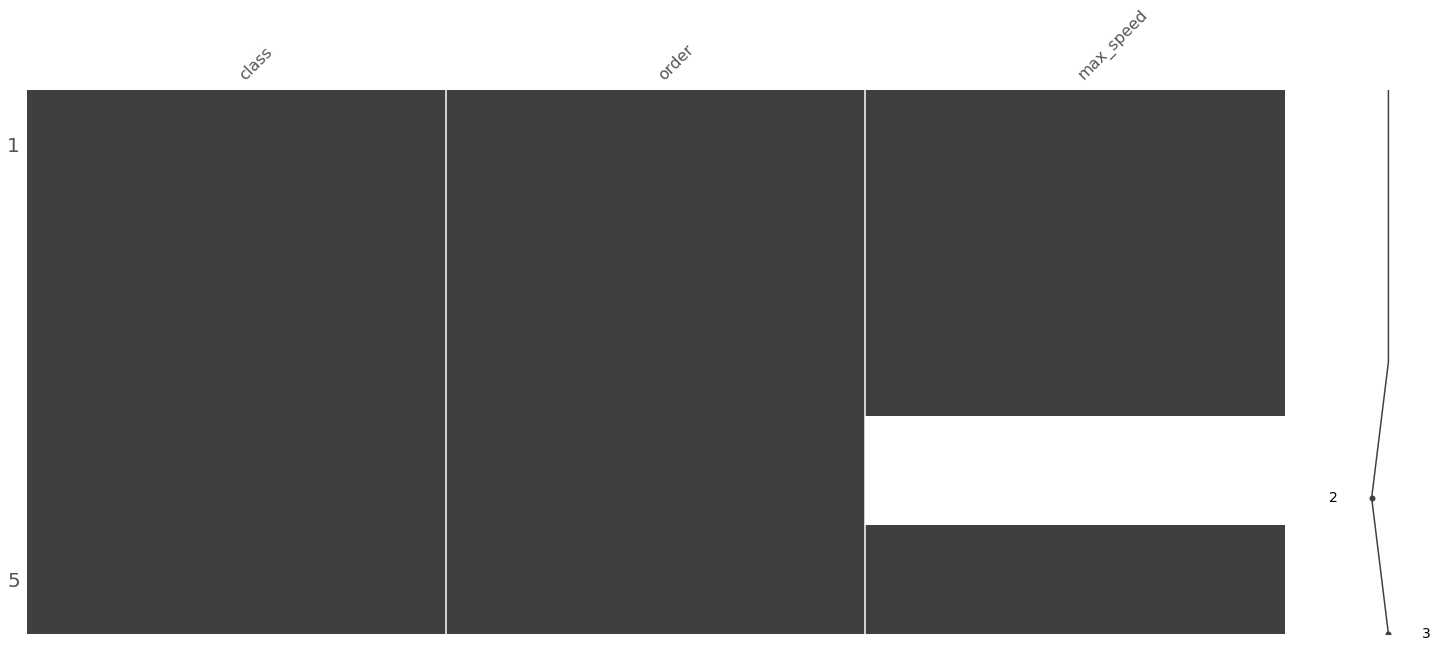

In [329]:
import missingno as msgn

msgn.matrix(df)

In [330]:
grouped = df.groupby('class')

In [331]:
grouped = df.groupby('order', axis='columns')

In [332]:
grouped = df.groupby(['class', 'order'])

In [333]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [334]:
df

,A,B,C,D
0,foo,one,0.612650,0.439653
1,bar,one,1.492006,0.981223
2,foo,two,0.118352,-0.384379
3,bar,three,0.326018,-0.185465
4,foo,two,-0.098226,-1.382146
5,bar,two,0.058766,-0.492498
6,foo,one,-0.048505,1.094369
7,foo,three,0.528782,-0.401418


In [335]:
grouped = df.groupby('A')

In [336]:
grouped = df.groupby(['A', 'B'])

In [337]:
df2 = df.set_index(['A', 'B'])

In [338]:
df2.index

MultiIndex([('foo',   'one'),
            ('bar',   'one'),
            ('foo',   'two'),
            ('bar', 'three'),
            ('foo',   'two'),
            ('bar',   'two'),
            ('foo',   'one'),
            ('foo', 'three')],
           names=['A', 'B'])

In [339]:
df2.index.names

FrozenList(['A', 'B'])

In [340]:
df2.index.names.difference(['B'])

FrozenList(['A'])

In [341]:
grouped = df2.groupby(level=df2.index.names.difference(['B']))

In [342]:
grouped.sum()

,C,D
A,,
bar,1.876791,0.30326
foo,1.113052,-0.63392


In [343]:
df2.groupby('A').sum()

,C,D
A,,
bar,1.876791,0.30326
foo,1.113052,-0.63392


In [344]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series(np.random.randint(1, 30, 6), index=lst)

In [345]:
s

1    17
2    23
3    23
1     9
2    29
3    19
dtype: int32

In [346]:
grouped = s.groupby(level=0)

In [347]:
grouped.first()

1    17
2    23
3    23
dtype: int32

In [348]:
grouped.last()

1     9
2    29
3    19
dtype: int32

In [349]:
grouped.sum()

1    26
2    52
3    42
dtype: int32

### GroupBy sorting

In [350]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                 index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                 columns=('class', 'order', 'max_speed'))

In [351]:
df.groupby('class', sort=False).sum()

,max_speed
class,
bird,413.0
mammal,138.2


In [352]:
df.groupby('class').get_group('bird')

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0


In [353]:
df.groupby('class').get_group('mammal')

,class,order,max_speed
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [354]:
df[df['class'] == 'bird']

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0


In [355]:
df[df['class'] == 'mammal']

,class,order,max_speed
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


### GroupBy dropna

In [356]:
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [357]:
df.groupby('max_speed').sum()

,class,order
max_speed,,
24.0,bird,Psittaciformes
58.0,mammal,Carnivora
80.2,mammal,Carnivora
389.0,bird,Falconiformes


In [358]:
df.groupby(by=['max_speed'], dropna=False).sum()

,class,order
max_speed,,
24.0,bird,Psittaciformes
58.0,mammal,Carnivora
80.2,mammal,Carnivora
389.0,bird,Falconiformes
NaN,mammal,Primates


### GroupBy object attributes

In [359]:
df.groupby('class').groups

{'bird': ['falcon', 'parrot'], 'mammal': ['lion', 'monkey', 'leopard']}

In [360]:
len(df.groupby('class').groups)

2

In [361]:
grouped = df.groupby('order')

In [362]:
grouped.groups

{'Carnivora': ['lion', 'leopard'], 'Falconiformes': ['falcon'], 'Primates': ['monkey'], 'Psittaciformes': ['parrot']}

In [363]:
grouped.count()

,class,max_speed
order,,
Carnivora,2,2
Falconiformes,1,1
Primates,1,0
Psittaciformes,1,1


In [364]:
grouped.nunique()

,class,max_speed
order,,
Carnivora,1,2
Falconiformes,1,1
Primates,1,0
Psittaciformes,1,1


### GroupBy with MultiIndex

In [365]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-08-07.csv'
df1 = pd.read_csv(url1)
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']
df1.set_index(['region', 'country'], inplace=True)

z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
      6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)
df2.set_index(df1.index.unique(), inplace=True)
df2.sort_index(level=0, inplace=True)

url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'
df3 = pd.read_csv(url2)
df3.set_index('country', inplace=True)
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']
df2 = df2.join(df3, on='country')
df2 = df2.assign(pkg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)
df2 = df2.assign(pkg_pc_usd = lambda x: x.amount_usd / x.popn)

df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        488.847057  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [366]:
grouped_region = df2.groupby(level=0)

In [367]:
grouped_region.groups

{'Central and West Asia': [('Central and West Asia', 'Afghanistan'), ('Central and West Asia', 'Armenia'), ('Central and West Asia', 'Azerbaijan'), ('Central and West Asia', 'Georgia'), ('Central and West Asia', 'Kazakhstan'), ('Central and West Asia', 'Kyrgyz Republic'), ('Central and West Asia', 'Pakistan'), ('Central and West Asia', 'Tajikistan'), ('Central and West Asia', 'Turkmenistan'), ('Central and West Asia', 'Uzbekistan')], 'East Asia': [('East Asia', 'Hong Kong, China'), ('East Asia', 'Mongolia'), ('East Asia', 'People's Republic of China'), ('East Asia', 'Republic of Korea'), ('East Asia', 'Taipei,China')], 'Other ADB Members': [('Other ADB Members', 'Australia'), ('Other ADB Members', 'Austria'), ('Other ADB Members', 'Belgium'), ('Other ADB Members', 'Canada'), ('Other ADB Members', 'Denmark'), ('Other ADB Members', 'Finland'), ('Other ADB Members', 'France'), ('Other ADB Members', 'Germany'), ('Other ADB Members', 'Ireland'), ('Other ADB Members', 'Italy'), ('Other ADB M

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


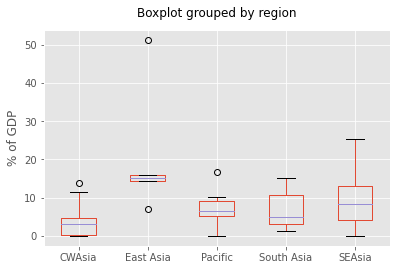

In [368]:
asia_region = ['East Asia', 'South Asia', 'Southeast Asia', 'Central and West Asia', 'Pacific']

ax = df2.loc[asia_region].reset_index().boxplot(column='pkg_gdp', by='region')
ax.set_xlabel('')
ax.set_xticklabels(['CWAsia', 'East Asia', 'Pacific', 'South Asia', 'SEAsia'])
ax.set_ylabel('% of GDP')
ax.set_title('')
plt.show()

In [369]:
df2.loc['Southeast Asia', 'pkg_gdp']

country
Brunei Darussalam     2.554178
Cambodia              8.267864
Indonesia             5.706596
Lao PDR               0.041141
Malaysia             21.474972
Myanmar               0.149475
Philippines           5.898206
Singapore            25.390631
Thailand             15.891051
Timor-Leste           8.645337
Viet Nam             10.129729
Name: pkg_gdp, dtype: float64

In [370]:
df2.loc['East Asia', 'pkg_gdp']

country
Hong Kong, China              51.316261
Mongolia                      15.988811
People's Republic of China    15.283073
Republic of Korea             14.445038
Taipei,China                   7.078300
Name: pkg_gdp, dtype: float64

In [371]:
df2.groupby(level='region').sum()[['amount_usd', 'pkg_gdp']]

,amount_usd,pkg_gdp
region,,
Central and West Asia,4.171278e+10,41.726928
East Asia,2.631514e+12,104.111483
Other ADB Members,1.660591e+13,551.288835
Other Economies,9.686523e+11,87.482088
Others,5.829794e+12,0.000000
Pacific,2.479101e+09,93.795397
South Asia,3.781328e+11,41.202361
Southeast Asia,3.685405e+11,104.149181


### Grouping DataFrame with Index levels and columns

In [372]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two'] * 4]

In [373]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [374]:
df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                  index=index)

In [375]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [376]:
df.groupby([pd.Grouper(level=1), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [377]:
df.groupby([pd.Grouper(level='first'), 'A']).sum()

,,B
first,A,
bar,1,1
baz,1,5
foo,2,9
qux,3,13


In [378]:
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

### Iterating through groups

In [379]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        488.847057  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [380]:
for region, country in grouped_region:
    print(region)
    print(country)

Central and West Asia
                                         amount_lcy    amount_usd  \
region                country                                       
Central and West Asia Afghanistan      8.000000e+09  1.016625e+08   
                      Armenia          3.000000e+11  6.134861e+08   
                      Azerbaijan       2.593500e+09  1.525588e+09   
                      Georgia          5.545956e+09  1.823888e+09   
                      Kazakhstan       9.810000e+12  2.379624e+10   
                      Kyrgyz Republic  1.924826e+10  2.580000e+08   
                      Pakistan         2.250135e+12  1.356053e+10   
                      Tajikistan       1.240000e+07  1.253464e+06   
                      Turkmenistan     0.000000e+00  0.000000e+00   
                      Uzbekistan       3.070000e+11  3.213240e+07   

                                            gdp_lcy       gdp_usd  \
region                country                                       
Central and

### Selecting a group

In [381]:
grouped_region.get_group('Southeast Asia')

amount_lcy    amount_usd       gdp_lcy  \
region         country                                                       
Southeast Asia Brunei Darussalam  4.500000e+08  3.181229e+08  1.690700e+10   
               Cambodia           8.963262e+12  2.210000e+09  1.083970e+14   
               Indonesia          9.639560e+14  6.344079e+10  1.607580e+16   
               Lao PDR            7.000000e+10  7.869126e+06  1.641470e+14   
               Malaysia           3.370000e+11  7.844872e+10  1.526750e+12   
               Myanmar            1.383000e+11  9.864479e+07  1.044580e+14   
               Philippines        1.071298e+12  2.104562e+10  1.873280e+13   
               Singapore          1.304905e+11  9.212178e+10  4.980840e+11   
               Thailand           2.700000e+12  8.409179e+10  1.692200e+13   
               Timor-Leste        2.540000e+08  2.540000e+08  2.938000e+09   
               Viet Nam           6.158000e+14  2.650312e+10  6.085060e+15   

                                       gdp_usd         popn    pkg_gdp  \
region         country                                                   
Southeast Asia Brunei Darussalam  1.245500e+10     428962.0   2.554178   
               Cambodia           2.673000e+10   16249798.0   8.267864   
               Indonesia          1.111710e+12  267663435.0   5.706596   
               Lao PDR            1.912700e+10    7061507.0   0.041141   
               Malaysia           3.653030e+11   31528585.0  21.474972   
               Myanmar            6.599400e+10   53708395.0   0.149475   
               Philippines        3.568140e+11  106651922.0   5.898206   
               Singapore          3.628180e+11    5638676.0  25.390631   
               Thailand           5.291770e+11   69428524.0  15.891051   
               Timor-Leste        2.938000e+09    1267972.0   8.645337   
               Viet Nam           2.616370e+11   95540395.0  10.129729   

                                    pkg_pc_usd  
region         country                          
Southeast Asia Brunei Darussalam    741.610928  
               Cambodia             136.001691  
               Indonesia            237.017038  
               Lao PDR                1.114369  
               Malaysia            2488.177549  
               Myanmar                1.836674  
               Philippines          197.329997  
               Singapore          16337.484018  
               Thailand            1211.199412  
               Timor-Leste          200.319881  
               Viet Nam             277.402247

In [382]:
grouped_region.get_group('East Asia')

amount_lcy    amount_usd  \
region    country                                                  
East Asia Hong Kong, China            1.486270e+12  1.914040e+11   
          Mongolia                    6.010294e+12  2.180394e+09   
          People's Republic of China  1.516643e+13  2.161057e+12   
          Republic of Korea           2.871916e+14  2.353862e+11   
          Taipei,China                1.250000e+12  4.148620e+10   

                                           gdp_lcy       gdp_usd  \
region    country                                                  
East Asia Hong Kong, China            2.921250e+12  3.729890e+11   
          Mongolia                    3.712890e+13  1.363700e+10   
          People's Republic of China  9.549700e+13  1.414020e+13   
          Republic of Korea           1.913640e+15  1.629530e+12   
          Taipei,China                1.824140e+13  5.861040e+11   

                                              popn    pkg_gdp    pkg_pc_usd  
region    country                                                            
East Asia Hong Kong, China            7.451000e+06  51.316261  25688.365157  
          Mongolia                    3.170208e+06  15.988811    687.776353  
          People's Republic of China  1.392730e+09  15.283073   1551.669810  
          Republic of Korea           5.163526e+07  14.445038   4558.633791  
          Taipei,China                2.358900e+07   7.078300   1758.709640

In [383]:
for region in asia_region:
    print(grouped_region.get_group(region))

                                        amount_lcy    amount_usd  \
region    country                                                  
East Asia Hong Kong, China            1.486270e+12  1.914040e+11   
          Mongolia                    6.010294e+12  2.180394e+09   
          People's Republic of China  1.516643e+13  2.161057e+12   
          Republic of Korea           2.871916e+14  2.353862e+11   
          Taipei,China                1.250000e+12  4.148620e+10   

                                           gdp_lcy       gdp_usd  \
region    country                                                  
East Asia Hong Kong, China            2.921250e+12  3.729890e+11   
          Mongolia                    3.712890e+13  1.363700e+10   
          People's Republic of China  9.549700e+13  1.414020e+13   
          Republic of Korea           1.913640e+15  1.629530e+12   
          Taipei,China                1.824140e+13  5.861040e+11   

                                              

### Aggregation

In [384]:
grouped_region.aggregate(np.sum).loc[asia_region, ['amount_lcy', 'amount_usd']]

,amount_lcy,amount_usd
region,,
East Asia,3.111046e+14,2.631514e+12
South Asia,2.840442e+13,3.781328e+11
Southeast Asia,1.593167e+15,3.685405e+11
Central and West Asia,1.270254e+13,4.171278e+10
Pacific,1.334721e+10,2.479101e+09


In [385]:
grouped_region.aggregate(np.mean).loc[asia_region, ['pkg_gdp', 'pkg_pc_usd']]

,pkg_gdp,pkg_pc_usd
region,,
East Asia,20.822297,6849.030950
South Asia,6.867060,223.234793
Southeast Asia,9.468107,1984.499437
Central and West Asia,4.172693,226.073756
Pacific,6.699671,456.389274


In [386]:
grouped_region.size().loc[asia_region]

region
East Asia                 5
South Asia                6
Southeast Asia           11
Central and West Asia    10
Pacific                  14
dtype: int64

In [387]:
grouped_region.describe().loc[asia_region, ['amount_usd', 'pkg_gdp'][::-1]]

pkg_gdp                                             \
                        count       mean        std       min        25%   
region                                                                     
East Asia                 5.0  20.822297  17.417623  7.078300  14.445038   
South Asia                6.0   6.867060   5.615953  1.195247   3.059687   
Southeast Asia           11.0   9.468107   8.318060  0.041141   4.130387   
Central and West Asia    10.0   4.172693   4.902895  0.000000   0.175506   
Pacific                  14.0   6.699671   4.347503  0.000000   5.292372   

                                                       amount_usd  \
                             50%        75%        max      count   
region                                                              
East Asia              15.283073  15.988811  51.316261        5.0   
South Asia              4.845162  10.737207  15.151040        6.0   
Southeast Asia          8.267864  13.010390  25.390631       11.0   
Central and West Asia   3.178637   4.719247  13.970997       10.0   
Pacific                 6.546364   9.195370  16.818182       14.0   

                                                                               \
                               mean           std           min           25%   
region                                                                          
East Asia              5.263028e+11  9.190977e+11  2.180394e+09  4.148620e+10   
South Asia             6.302213e+10  1.468675e+11  1.626655e+08  5.816137e+08   
Southeast Asia         3.350368e+10  3.813098e+10  7.869126e+06  2.860615e+08   
Central and West Asia  4.171278e+09  8.043366e+09  0.000000e+00  4.951492e+07   
Pacific                1.770786e+08  4.430311e+08  0.000000e+00  9.783900e+06   

                                                                 
                                50%           75%           max  
region                                                           
East Asia              1.914040e+11  2.353862e+11  2.161057e+12  
South Asia             1.394685e+09  9.497517e+09  3.626717e+11  
Southeast Asia         2.104562e+10  7.094476e+10  9.212178e+10  
Central and West Asia  4.357430e+08  1.749313e+09  2.379624e+10  
Pacific                3.595130e+07  4.702228e+07  1.643578e+09

In [388]:
grouped_region.std().loc[asia_region, ['amount_usd', 'pkg_gdp']]

,amount_usd,pkg_gdp
region,,
East Asia,9.190977e+11,17.417623
South Asia,1.468675e+11,5.615953
Southeast Asia,3.813098e+10,8.318060
Central and West Asia,8.043366e+09,4.902895
Pacific,4.430311e+08,4.347503


### Applying multiple functions at once

In [389]:
grouped_region.aggregate([np.mean, np.max, np.min, np.std]).loc[asia_region, 'pkg_gdp']

,mean,amax,amin,std
region,,,,
East Asia,20.822297,51.316261,7.078300,17.417623
South Asia,6.867060,15.151040,1.195247,5.615953
Southeast Asia,9.468107,25.390631,0.041141,8.318060
Central and West Asia,4.172693,13.970997,0.000000,4.902895
Pacific,6.699671,16.818182,0.000000,4.347503


In [390]:
grouped_region.aggregate([np.sum, np.max, np.min, np.std]).loc[asia_region, 'amount_usd']

,sum,amax,amin,std
region,,,,
East Asia,2.631514e+12,2.161057e+12,2.180394e+09,9.190977e+11
South Asia,3.781328e+11,3.626717e+11,1.626655e+08,1.468675e+11
Southeast Asia,3.685405e+11,9.212178e+10,7.869126e+06,3.813098e+10
Central and West Asia,4.171278e+10,2.379624e+10,0.000000e+00,8.043366e+09
Pacific,2.479101e+09,1.643578e+09,0.000000e+00,4.430311e+08


In [391]:
grouped_region.aggregate([np.mean, np.max, np.min, np.std]).loc[asia_region, 'pkg_gdp'].rename(
columns={'mean':'Mean', 'amax':'Max', 'amin':'Min', 'std':'Std Deviation'})

,Mean,Max,Min,Std Deviation
region,,,,
East Asia,20.822297,51.316261,7.078300,17.417623
South Asia,6.867060,15.151040,1.195247,5.615953
Southeast Asia,9.468107,25.390631,0.041141,8.318060
Central and West Asia,4.172693,13.970997,0.000000,4.902895
Pacific,6.699671,16.818182,0.000000,4.347503


In [392]:
grouped_region.aggregate([np.sum, np.max, np.min, np.std]).loc[asia_region, 'amount_usd'].rename(
columns={'sum':'Total', 'amax':'Max', 'amin':'Min', 'std':'Std Deviation'})

,Total,Max,Min,Std Deviation
region,,,,
East Asia,2.631514e+12,2.161057e+12,2.180394e+09,9.190977e+11
South Asia,3.781328e+11,3.626717e+11,1.626655e+08,1.468675e+11
Southeast Asia,3.685405e+11,9.212178e+10,7.869126e+06,3.813098e+10
Central and West Asia,4.171278e+10,2.379624e+10,0.000000e+00,8.043366e+09
Pacific,2.479101e+09,1.643578e+09,0.000000e+00,4.430311e+08


### Named aggregation

In [393]:
df_1 = grouped_region.aggregate(region_total_amount=pd.NamedAgg(column='amount_usd', aggfunc='sum'),
                         region_average_shareGDP = pd.NamedAgg(column='pkg_gdp', aggfunc='mean')).loc[asia_region]

In [394]:
df_1

,region_total_amount,region_average_shareGDP
region,,
East Asia,2.631514e+12,20.822297
South Asia,3.781328e+11,6.867060
Southeast Asia,3.685405e+11,9.468107
Central and West Asia,4.171278e+10,4.172693
Pacific,2.479101e+09,6.699671


Text(0.5, 0, '')

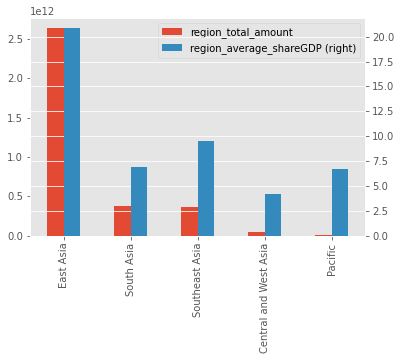

In [395]:
ax = df_1.plot(kind='bar', secondary_y='region_average_shareGDP')
ax.set_xlabel('')

### Applying different functions to DataFrame columns

In [396]:
grouped_region.aggregate({'amount_usd': 'sum', 'pkg_gdp': 'mean', 'pkg_pc_usd': 'mean'}).rename(
columns={'amount_usd': 'Total amount of package (USD)', 'pkg_gdp': 'Average share to GDP', 
         'pkg_pc_usd': 'Average amount of package per capita (USD)'}).loc[asia_region]

,Total amount of package (USD),Average share to GDP,Average amount of package per capita (USD)
region,,,
East Asia,2.631514e+12,20.822297,6849.030950
South Asia,3.781328e+11,6.867060,223.234793
Southeast Asia,3.685405e+11,9.468107,1984.499437
Central and West Asia,4.171278e+10,4.172693,226.073756
Pacific,2.479101e+09,6.699671,456.389274


In [397]:
grouped_region.agg({'amount_usd': lambda x: np.std(x)}).rename(columns={'amount_usd': 'Standard deviation'})

,Standard deviation
region,
Central and West Asia,7.630607e+09
East Asia,8.220660e+11
Other ADB Members,1.551015e+12
Other Economies,1.640514e+11
Others,2.062315e+12
Pacific,4.269154e+08
South Asia,1.340710e+11
Southeast Asia,3.635647e+10


### Transformation

In [398]:
index = pd.date_range('20200811', periods=1100)

In [399]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

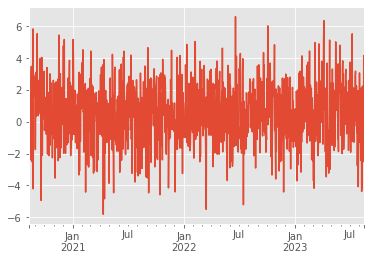

In [400]:
ts.plot()

In [401]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

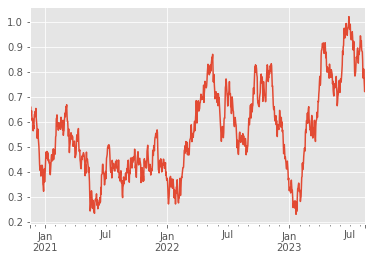

In [402]:
ts.plot()

In [403]:
ts.head()

2020-11-18    0.645524
2020-11-19    0.660977
2020-11-20    0.646294
2020-11-21    0.626180
2020-11-22    0.644555
Freq: D, dtype: float64

In [404]:
ts.tail()

2023-08-11    0.811554
2023-08-12    0.775749
2023-08-13    0.749607
2023-08-14    0.720776
2023-08-15    0.772746
Freq: D, dtype: float64

In [405]:
grouped = ts.groupby(lambda x: x.year)

In [406]:
grouped.mean()

2020    0.522567
2021    0.441773
2022    0.598755
2023    0.693407
dtype: float64

In [407]:
grouped.std()

2020    0.106003
2021    0.085699
2022    0.148601
2023    0.220561
dtype: float64

In [408]:
transformed = (ts.groupby(lambda x: x.year)).transform(lambda x: (x - x.mean()) / x.std())

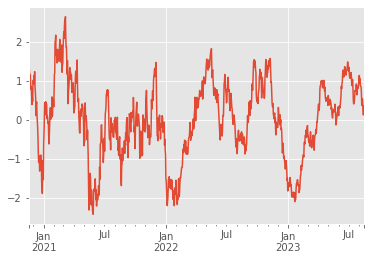

In [409]:
transformed.plot()

In [410]:
transformed.head()

2020-11-18    1.159930
2020-11-19    1.305710
2020-11-20    1.167201
2020-11-21    0.977445
2020-11-22    1.150796
Freq: D, dtype: float64

In [411]:
transformed.tail()

2023-08-11    0.535666
2023-08-12    0.373330
2023-08-13    0.254804
2023-08-14    0.124085
2023-08-15    0.359714
Freq: D, dtype: float64

In [412]:
grouped_trans = transformed.groupby(lambda x: x.year)

In [413]:
grouped_trans.mean()

2020   -6.207156e-16
2021   -4.301886e-15
2022   -1.132123e-15
2023    2.285739e-15
dtype: float64

In [414]:
grouped_trans.std()

2020    1.0
2021    1.0
2022    1.0
2023    1.0
dtype: float64

In [415]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})

In [416]:
compare

,Original,Transformed
2020-11-18,0.645524,1.159930
2020-11-19,0.660977,1.305710
2020-11-20,0.646294,1.167201
2020-11-21,0.626180,0.977445
2020-11-22,0.644555,1.150796
...,...,...
2023-08-11,0.811554,0.535666
2023-08-12,0.775749,0.373330
2023-08-13,0.749607,0.254804
2023-08-14,0.720776,0.124085


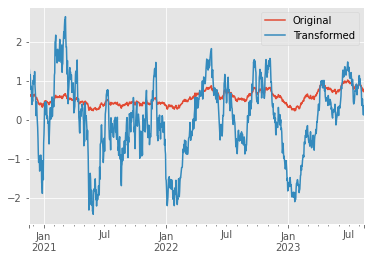

In [417]:
compare.plot()

In [418]:
data_df = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'])

In [419]:
data_df

,A,B,C
0,0.297190,-0.549766,-1.344885
1,-1.282054,-0.479032,-0.749571
2,-1.289648,1.105502,0.634373
3,-0.323295,1.997360,-0.149319
4,0.176753,0.978171,1.591900
...,...,...,...
995,0.593425,0.722026,-0.489015
996,0.620565,-0.682876,-0.164314
997,0.163278,1.794754,0.143682
998,-0.268904,-0.480222,-0.238415


In [420]:
data_df['A'][np.random.randint(0, 1000, 10)] = np.nan
data_df['B'][np.random.randint(0, 1000, 10)] = np.nan
data_df['C'][np.random.randint(0, 1000, 10)] = np.nan

In [421]:
data_df

,A,B,C
0,0.297190,-0.549766,-1.344885
1,-1.282054,-0.479032,-0.749571
2,-1.289648,1.105502,0.634373
3,-0.323295,1.997360,-0.149319
4,0.176753,0.978171,1.591900
...,...,...,...
995,0.593425,0.722026,-0.489015
996,0.620565,-0.682876,-0.164314
997,0.163278,1.794754,0.143682
998,-0.268904,-0.480222,-0.238415


In [422]:
countries = np.array(['US', 'UK', 'GR', 'JP'])

In [423]:
np.random.randint(0, 4, 1000)

array([1, 1, 1, 3, 1, 3, 0, 2, 1, 0, 0, 0, 3, 2, 3, 0, 3, 3, 2, 3, 3, 0,
       0, 1, 2, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 3, 3, 3, 3, 2, 0, 1, 0, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2, 1, 1, 3, 2,
       0, 2, 3, 3, 3, 2, 0, 2, 3, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 3,
       2, 0, 0, 1, 2, 2, 3, 2, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 3, 2, 1,
       2, 2, 2, 3, 3, 0, 3, 2, 1, 1, 3, 2, 1, 0, 0, 3, 1, 1, 0, 1, 1, 0,
       2, 0, 3, 0, 0, 1, 1, 1, 0, 3, 1, 1, 1, 2, 2, 1, 0, 3, 2, 0, 3, 3,
       1, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2,
       0, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 2, 3, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 0, 2, 3, 2,
       1, 2, 3, 2, 1, 3, 0, 1, 2, 3, 3, 3, 3, 3, 0,

In [424]:
key = countries[np.random.randint(0, 4, 1000)]

In [425]:
key

array(['UK', 'GR', 'GR', 'JP', 'JP', 'GR', 'GR', 'US', 'UK', 'UK', 'GR',
       'UK', 'US', 'GR', 'US', 'US', 'GR', 'UK', 'JP', 'JP', 'UK', 'UK',
       'US', 'GR', 'GR', 'JP', 'UK', 'JP', 'GR', 'UK', 'JP', 'US', 'US',
       'US', 'UK', 'US', 'UK', 'GR', 'UK', 'US', 'JP', 'US', 'JP', 'JP',
       'JP', 'UK', 'US', 'GR', 'GR', 'US', 'US', 'JP', 'GR', 'US', 'UK',
       'UK', 'UK', 'GR', 'GR', 'US', 'JP', 'GR', 'US', 'UK', 'UK', 'US',
       'US', 'UK', 'UK', 'GR', 'US', 'GR', 'US', 'GR', 'JP', 'US', 'UK',
       'GR', 'GR', 'UK', 'JP', 'GR', 'UK', 'GR', 'GR', 'GR', 'UK', 'JP',
       'US', 'JP', 'US', 'US', 'JP', 'GR', 'GR', 'UK', 'UK', 'GR', 'GR',
       'US', 'US', 'JP', 'JP', 'US', 'US', 'US', 'US', 'GR', 'JP', 'UK',
       'JP', 'GR', 'GR', 'JP', 'GR', 'UK', 'UK', 'US', 'US', 'JP', 'US',
       'UK', 'GR', 'JP', 'US', 'UK', 'UK', 'UK', 'GR', 'JP', 'US', 'JP',
       'US', 'US', 'JP', 'JP', 'GR', 'GR', 'GR', 'US', 'US', 'US', 'UK',
       'US', 'UK', 'JP', 'JP', 'UK', 'GR', 'US', 'J

In [426]:
grouped = data_df.groupby(key)

In [427]:
grouped.count()

,A,B,C
GR,245,241,242
JP,260,260,260
UK,226,229,227
US,259,260,261


In [428]:
transformed = grouped.transform(lambda x: x.fillna(x.mean()))

In [429]:
grouped_trans = transformed.groupby(key)

In [430]:
grouped.mean()

,A,B,C
GR,0.041654,-0.023547,0.082700
JP,-0.011785,-0.033759,-0.014009
UK,0.076367,0.053741,-0.122353
US,0.075299,0.039587,-0.104212


In [431]:
grouped_trans.mean()

,A,B,C
GR,0.041654,-0.023547,0.082700
JP,-0.011785,-0.033759,-0.014009
UK,0.076367,0.053741,-0.122353
US,0.075299,0.039587,-0.104212


In [432]:
grouped.count()

,A,B,C
GR,245,241,242
JP,260,260,260
UK,226,229,227
US,259,260,261


In [433]:
grouped_trans.count()

,A,B,C
GR,245,245,245
JP,262,262,262
UK,231,231,231
US,262,262,262


In [434]:
grouped_trans.size()

GR    245
JP    262
UK    231
US    262
dtype: int64

### Window and resample operations

In [435]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,
                      'B': np.arange(20)})

In [436]:
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [437]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [438]:
df_re.groupby('A').expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

In [439]:
df_re = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=4, freq='W'),
                      'group': [1] * 2 + [2] * 2,
                      'val': [5, 6, 7, 8]}).set_index('date')

In [440]:
df_re

,group,val
date,,
2020-01-05,1,5
2020-01-12,1,6
2020-01-19,2,7
2020-01-26,2,8


In [441]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2020-01-05      1    5
      2020-01-06      1    5
      2020-01-07      1    5
      2020-01-08      1    5
      2020-01-09      1    5
      2020-01-10      1    5
      2020-01-11      1    5
      2020-01-12      1    6
2     2020-01-19      2    7
      2020-01-20      2    7
      2020-01-21      2    7
      2020-01-22      2    7
      2020-01-23      2    7
      2020-01-24      2    7
      2020-01-25      2    7
      2020-01-26      2    8

In [442]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [443]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

### Dispatching to instance methods

In [444]:
grouped_region.sum()

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
region,,,,,,,
Central and West Asia,1.270254e+13,4.171278e+10,6.363661e+14,6.733910e+11,3.385120e+08,41.726928,2260.737563
East Asia,3.111046e+14,2.631514e+12,2.067429e+15,1.674246e+13,1.478575e+09,104.111483,34245.154750
Other ADB Members,3.834398e+14,1.660591e+13,6.132379e+14,4.818727e+13,1.015085e+09,551.288835,283977.924382
Other Economies,3.300998e+15,9.686523e+11,2.330315e+16,7.549986e+12,9.922108e+08,87.482088,7843.369982
Others,5.270135e+12,5.829794e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
Pacific,1.334721e+10,2.479101e+09,2.162848e+11,3.469767e+10,1.108472e+07,93.795397,6389.449841
South Asia,2.840442e+13,3.781328e+11,2.556299e+14,3.378042e+12,1.565001e+09,41.202361,1339.408759
Southeast Asia,1.593167e+15,3.685405e+11,2.257556e+16,3.114703e+12,6.551682e+08,104.149181,21829.493805


In [445]:
tsdf = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('1/1/2020', periods=1000),
                    columns=list('abc'.upper()))

In [446]:
tsdf.iloc[::2] = np.nan

In [447]:
tsdf

,A,B,C
2020-01-01,NaN,NaN,NaN
2020-01-02,-0.017176,1.434421,0.821834
2020-01-03,NaN,NaN,NaN
2020-01-04,0.015384,1.258023,1.045949
2020-01-05,NaN,NaN,NaN
...,...,...,...
2022-09-22,0.049271,-0.908410,-0.429346
2022-09-23,NaN,NaN,NaN
2022-09-24,1.214230,-0.643348,0.418971
2022-09-25,NaN,NaN,NaN


In [448]:
grouped = tsdf.groupby(lambda x: x.year)

In [449]:
grouped.mean()

,A,B,C
2020,0.065539,-0.051456,-0.055944
2021,-0.028385,-0.019814,0.026636
2022,0.073447,0.080601,0.085353


In [450]:
grouped.count()

,A,B,C
2020,183,183,183
2021,182,182,182
2022,135,135,135


In [451]:
grouped.size()

2020    366
2021    365
2022    269
dtype: int64

In [452]:
grouped.fillna(method='pad')

,A,B,C
2020-01-01,NaN,NaN,NaN
2020-01-02,-0.017176,1.434421,0.821834
2020-01-03,-0.017176,1.434421,0.821834
2020-01-04,0.015384,1.258023,1.045949
2020-01-05,0.015384,1.258023,1.045949
...,...,...,...
2022-09-22,0.049271,-0.908410,-0.429346
2022-09-23,0.049271,-0.908410,-0.429346
2022-09-24,1.214230,-0.643348,0.418971
2022-09-25,1.214230,-0.643348,0.418971


In [453]:
s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])

In [454]:
g = pd.Series(list('abababab'))

In [455]:
gb = s.groupby(g)

In [456]:
gb.nlargest(3)

a  4    19.0
   0     9.0
   2     7.0
b  1     8.0
   3     5.0
   7     3.3
dtype: float64

In [457]:
gb.nsmallest(3)

a  6    4.2
   2    7.0
   0    9.0
b  5    1.0
   7    3.3
   3    5.0
dtype: float64

In [458]:
grouped_region.sum()['amount_usd'].nlargest(3)

region
Other ADB Members    1.660591e+13
Others               5.829794e+12
East Asia            2.631514e+12
Name: amount_usd, dtype: float64

In [459]:
grouped_region.mean()['pkg_gdp'].nlargest(3)

region
Other ADB Members    25.058583
East Asia            20.822297
Other Economies       9.720232
Name: pkg_gdp, dtype: float64

### Flexible apply

In [460]:
grouped_region[['pkg_gdp', 'amount_usd']].apply(lambda x: x.describe())

pkg_gdp    amount_usd
region                                              
Central and West Asia count  10.000000  1.000000e+01
                      mean    4.172693  4.171278e+09
                      std     4.902895  8.043366e+09
                      min     0.000000  0.000000e+00
                      25%     0.175506  4.951492e+07
...                                ...           ...
Southeast Asia        min     0.041141  7.869126e+06
                      25%     4.130387  2.860615e+08
                      50%     8.267864  2.104562e+10
                      75%    13.010390  7.094476e+10
                      max    25.390631  9.212178e+10

[64 rows x 2 columns]

In [461]:
grouped_region[['pkg_gdp', 'amount_usd']].apply(lambda x: x.describe()).loc['Southeast Asia']

,pkg_gdp,amount_usd
count,11.000000,1.100000e+01
mean,9.468107,3.350368e+10
std,8.318060,3.813098e+10
min,0.041141,7.869126e+06
25%,4.130387,2.860615e+08
50%,8.267864,2.104562e+10
75%,13.010390,7.094476e+10
max,25.390631,9.212178e+10


In [462]:
df = pd.DataFrame({'A': ['foo', 'bar'] * 3 + ['foo'] * 2,
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [463]:
df

,A,B,C,D
0,foo,one,0.045266,-0.692207
1,bar,one,0.387637,0.661174
2,foo,two,-0.644865,0.990210
3,bar,three,-0.005228,0.707419
4,foo,two,0.253991,0.414328
5,bar,two,-0.896371,-0.402286
6,foo,one,-1.044476,2.141890
7,foo,three,2.169657,1.279413


In [464]:
grouped = df.groupby('A')['C']

In [465]:
def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})

In [466]:
grouped.apply(f)

,original,demeaned
0,0.045266,-0.110649
1,0.387637,0.558957
2,-0.644865,-0.800779
3,-0.005228,0.166093
4,0.253991,0.098077
5,-0.896371,-0.725050
6,-1.044476,-1.200391
7,2.169657,2.013742


### Grouping with ordered factors

In [467]:
data = pd.Series(np.random.randn(100))

In [468]:
factor = pd.qcut(data, 4)

In [469]:
data.groupby(factor).mean()

(-2.645, -0.81]   -1.312216
(-0.81, -0.207]   -0.509542
(-0.207, 0.572]    0.210741
(0.572, 2.03]      1.184393
dtype: float64

### Grouping with a grouper specification

In [470]:
import datetime

df = pd.DataFrame({'Branch': 'A A A A A A A B'.split(),
                   'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
                   'Quantity': [1, 3, 5, 1, 8, 1, 9, 3],
                   'Date': [datetime.datetime(1989, 8, 17, 13, 0),
                            datetime.datetime(1993, 10, 3, 13, 5),
                            datetime.datetime(1994, 10, 16, 20, 0),
                            datetime.datetime(1996, 8, 25, 12, 5),
                            datetime.datetime(1999, 8, 19, 14, 0),
                            datetime.datetime(1994, 10, 16, 20, 0),
                            datetime.datetime(1996, 8, 25, 12, 5),
                            datetime.datetime(1999, 8, 19, 14, 0)]})

In [471]:
df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,1989-08-17 13:00:00
1,A,Mark,3,1993-10-03 13:05:00
2,A,Carl,5,1994-10-16 20:00:00
3,A,Carl,1,1996-08-25 12:05:00
4,A,Joe,8,1999-08-19 14:00:00
5,A,Joe,1,1994-10-16 20:00:00
6,A,Joe,9,1996-08-25 12:05:00
7,B,Carl,3,1999-08-19 14:00:00


In [472]:
df.groupby([pd.Grouper(freq='1M', key='Date'), 'Buyer']).sum()

Quantity
Date       Buyer          
1989-08-31 Carl          1
1993-10-31 Mark          3
1994-10-31 Carl          5
           Joe           1
1996-08-31 Carl          1
           Joe           9
1999-08-31 Carl          3
           Joe           8

In [477]:
df2.groupby(pd.Grouper(level=0)).mean().loc[asia_region, ['amount_usd', 'pkg_gdp']]

,amount_usd,pkg_gdp
region,,
East Asia,5.263028e+11,20.822297
South Asia,6.302213e+10,6.867060
Southeast Asia,3.350368e+10,9.468107
Central and West Asia,4.171278e+09,4.172693
Pacific,1.770786e+08,6.699671


In [478]:
df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,1989-08-17 13:00:00
1,A,Mark,3,1993-10-03 13:05:00
2,A,Carl,5,1994-10-16 20:00:00
3,A,Carl,1,1996-08-25 12:05:00
4,A,Joe,8,1999-08-19 14:00:00
5,A,Joe,1,1994-10-16 20:00:00
6,A,Joe,9,1996-08-25 12:05:00
7,B,Carl,3,1999-08-19 14:00:00


In [479]:
df = df.set_index('Date')

In [480]:
df

,Branch,Buyer,Quantity
Date,,,
1989-08-17 13:00:00,A,Carl,1
1993-10-03 13:05:00,A,Mark,3
1994-10-16 20:00:00,A,Carl,5
1996-08-25 12:05:00,A,Carl,1
1999-08-19 14:00:00,A,Joe,8
1994-10-16 20:00:00,A,Joe,1
1996-08-25 12:05:00,A,Joe,9
1999-08-19 14:00:00,B,Carl,3


In [481]:
df['Date'] = df.index + pd.offsets.MonthEnd(2)

In [482]:
df

,Branch,Buyer,Quantity,Date
Date,,,,
1989-08-17 13:00:00,A,Carl,1,1989-09-30 13:00:00
1993-10-03 13:05:00,A,Mark,3,1993-11-30 13:05:00
1994-10-16 20:00:00,A,Carl,5,1994-11-30 20:00:00
1996-08-25 12:05:00,A,Carl,1,1996-09-30 12:05:00
1999-08-19 14:00:00,A,Joe,8,1999-09-30 14:00:00
1994-10-16 20:00:00,A,Joe,1,1994-11-30 20:00:00
1996-08-25 12:05:00,A,Joe,9,1996-09-30 12:05:00
1999-08-19 14:00:00,B,Carl,3,1999-09-30 14:00:00


In [483]:
df.groupby([pd.Grouper(freq='6M', key='Date'), 'Buyer']).sum()

Quantity
Date       Buyer          
1989-09-30 Carl          1
1994-03-31 Mark          3
1995-03-31 Carl          5
           Joe           1
1996-09-30 Carl          1
           Joe           9
1999-09-30 Carl          3
           Joe           8

### Taking the first rows and nth row of each group

In [484]:
grouped_region.head(1)

,,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
region,country,,,,,,,
Central and West Asia,Afghanistan,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893
East Asia,"Hong Kong, China",1.486270e+12,1.914040e+11,2.921250e+12,3.729890e+11,7451000.0,51.316261,25688.365157
Other ADB Members,Australia,4.399310e+11,2.735491e+11,1.983330e+12,1.376260e+12,24992369.0,19.876266,10945.305102
Other Economies,Arab Republic of Egypt,3.334800e+11,2.122053e+10,5.324440e+12,3.022560e+11,98423595.0,7.020713,215.604061
Others,European Central Bank,4.499400e+12,4.977212e+12,NaN,NaN,NaN,NaN,NaN
Pacific,Cook Islands,6.100000e+07,3.690260e+07,5.478115e+08,3.608771e+08,19301.0,10.225808,1911.952800
South Asia,Bangladesh,1.026065e+12,1.207846e+10,2.744710e+13,3.174650e+11,161356039.0,3.804658,74.855940
Southeast Asia,Brunei Darussalam,4.500000e+08,3.181229e+08,1.690700e+10,1.245500e+10,428962.0,2.554178,741.610928


In [485]:
grouped_region.tail(2)

amount_lcy    amount_usd  \
region                country                                             
Central and West Asia Turkmenistan           0.000000e+00  0.000000e+00   
                      Uzbekistan             3.070000e+11  3.213240e+07   
East Asia             Republic of Korea      2.871916e+14  2.353862e+11   
                      Taipei,China           1.250000e+12  4.148620e+10   
Other ADB Members     United Kingdom         6.304668e+11  7.805823e+11   
                      United States          6.885716e+12  6.885716e+12   
Other Economies       Saudi Arabia           2.307350e+11  6.152933e+10   
                      South Africa           3.955000e+11  2.383148e+10   
Others                European Central Bank  4.499400e+12  4.977212e+12   
                      European Union         7.707347e+11  8.525821e+11   
Pacific               Tuvalu                 5.789000e+06  3.863318e+06   
                      Vanuatu                5.900000e+09  5.014022e+07   
South Asia            Nepal                  2.000000e+11  1.754694e+09   
                      Sri Lanka              1.914739e+11  1.034677e+09   
Southeast Asia        Timor-Leste            2.540000e+08  2.540000e+08   
                      Viet Nam               6.158000e+14  2.650312e+10   

                                                  gdp_lcy       gdp_usd  \
region                country                                             
Central and West Asia Turkmenistan           1.633600e+11  4.667400e+10   
                      Uzbekistan             5.233730e+14  6.049000e+10   
East Asia             Republic of Korea      1.913640e+15  1.629530e+12   
                      Taipei,China           1.824140e+13  5.861040e+11   
Other ADB Members     United Kingdom         2.184920e+12  2.743590e+12   
                      United States          2.143950e+13  2.143950e+13   
Other Economies       Saudi Arabia           2.922340e+12  7.792890e+11   
                      South Africa           5.120850e+12  3.588390e+11   
Others                European Central Bank           NaN           NaN   
                      European Union                  NaN           NaN   
Pacific               Tuvalu                 5.900000e+07  4.200000e+07   
                      Vanuatu                1.067500e+11  9.510000e+08   
South Asia            Nepal                  3.464320e+12  2.981300e+10   
                      Sri Lanka              1.545150e+13  8.656600e+10   
Southeast Asia        Timor-Leste            2.938000e+09  2.938000e+09   
                      Viet Nam               6.085060e+15  2.616370e+11   

                                                    popn    pkg_gdp  \
region                country                                         
Central and West Asia Turkmenistan             5850908.0   0.000000   
                      Uzbekistan              32955400.0   0.053120   
East Asia             Republic of Korea       51635256.0  14.445038   
                      Taipei,China            23589000.0   7.078300   
Other ADB Members     United Kingdom          66488991.0  28.451127   
                      United States          327167434.0  32.116962   
Other Economies       Saudi Arabia            33699947.0   7.895573   
                      South Africa            57779622.0   6.641274   
Others                European Central Bank          NaN        NaN   
                      European Union                 NaN        NaN   
Pacific               Tuvalu                     11508.0   9.198376   
                      Vanuatu                   292680.0   5.272368   
South Asia            Nepal                   28087871.0   5.885667   
                      Sri Lanka               21670000.0   1.195247   
Southeast Asia        Timor-Leste              1267972.0   8.645337   
                      Viet Nam                95540395.0  10.129729   

                                               pkg_pc_usd  
region

In [486]:
grouped_region.nth(3)

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
region,,,,,,,
Central and West Asia,5.545956e+09,1.823888e+09,4.474900e+10,1.592500e+10,3731000.0,11.452988,488.847057
East Asia,2.871916e+14,2.353862e+11,1.913640e+15,1.629530e+12,51635256.0,14.445038,4558.633791
Other ADB Members,8.519971e+11,6.106406e+11,2.297550e+12,1.730910e+12,37058856.0,35.278587,16477.588940
Other Economies,3.280520e+15,7.810766e+10,2.298230e+16,4.585000e+11,81800269.0,17.035476,954.858213
Pacific,0.000000e+00,0.000000e+00,2.630000e+08,1.840000e+08,115847.0,0.000000,0.000000
South Asia,2.500000e+09,1.626655e+08,8.915800e+10,5.786000e+09,515696.0,2.811363,315.428993
Southeast Asia,7.000000e+10,7.869126e+06,1.641470e+14,1.912700e+10,7061507.0,0.041141,1.114369


In [487]:
grouped_region.nth(-1)

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
region,,,,,,,
Central and West Asia,3.070000e+11,3.213240e+07,5.233730e+14,6.049000e+10,32955400.0,0.053120,0.975027
East Asia,1.250000e+12,4.148620e+10,1.824140e+13,5.861040e+11,23589000.0,7.078300,1758.709640
Other ADB Members,6.885716e+12,6.885716e+12,2.143950e+13,2.143950e+13,327167434.0,32.116962,21046.459043
Other Economies,3.955000e+11,2.383148e+10,5.120850e+12,3.588390e+11,57779622.0,6.641274,412.454785
Others,7.707347e+11,8.525821e+11,NaN,NaN,NaN,NaN,NaN
Pacific,5.900000e+09,5.014022e+07,1.067500e+11,9.510000e+08,292680.0,5.272368,171.314138
South Asia,1.914739e+11,1.034677e+09,1.545150e+13,8.656600e+10,21670000.0,1.195247,47.746986
Southeast Asia,6.158000e+14,2.650312e+10,6.085060e+15,2.616370e+11,95540395.0,10.129729,277.402247


In [488]:
grouped_region.first()

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
region,,,,,,,
Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893
East Asia,1.486270e+12,1.914040e+11,2.921250e+12,3.729890e+11,7451000.0,51.316261,25688.365157
Other ADB Members,4.399310e+11,2.735491e+11,1.983330e+12,1.376260e+12,24992369.0,19.876266,10945.305102
Other Economies,3.334800e+11,2.122053e+10,5.324440e+12,3.022560e+11,98423595.0,7.020713,215.604061
Others,4.499400e+12,4.977212e+12,NaN,NaN,NaN,NaN,NaN
Pacific,6.100000e+07,3.690260e+07,5.478115e+08,3.608771e+08,19301.0,10.225808,1911.952800
South Asia,1.026065e+12,1.207846e+10,2.744710e+13,3.174650e+11,161356039.0,3.804658,74.855940
Southeast Asia,4.500000e+08,3.181229e+08,1.690700e+10,1.245500e+10,428962.0,2.554178,741.610928


### Enumerate group items and groups

In [489]:
grouped_region.cumcount()

region                 country    
Central and West Asia  Afghanistan     0
                       Armenia         1
                       Azerbaijan      2
                       Georgia         3
                       Kazakhstan      4
                                      ..
Southeast Asia         Philippines     6
                       Singapore       7
                       Thailand        8
                       Timor-Leste     9
                       Viet Nam       10
Length: 79, dtype: int64

In [490]:
grouped_region.ngroup()

region                 country    
Central and West Asia  Afghanistan    0
                       Armenia        0
                       Azerbaijan     0
                       Georgia        0
                       Kazakhstan     0
                                     ..
Southeast Asia         Philippines    7
                       Singapore      7
                       Thailand       7
                       Timor-Leste    7
                       Viet Nam       7
Length: 79, dtype: int64